In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

seed = np.random.seed(0)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


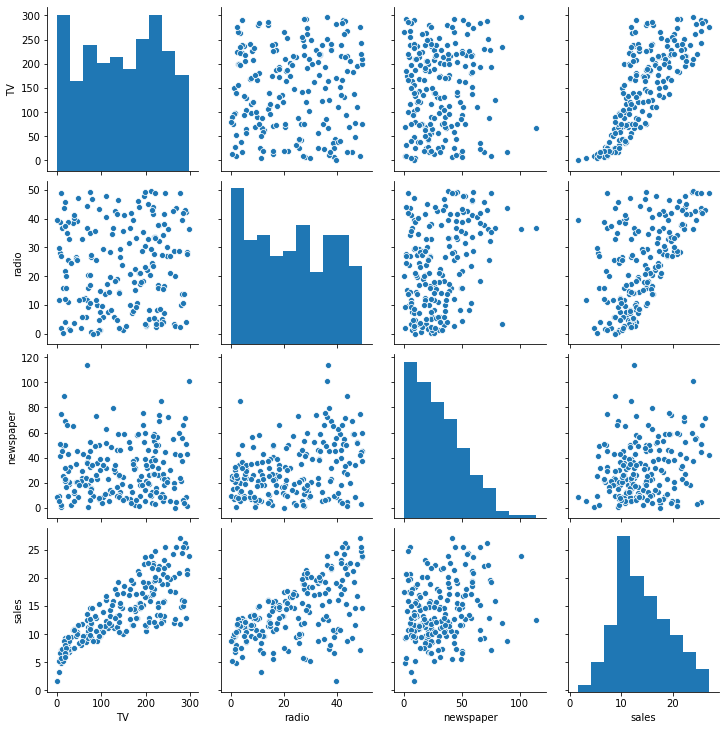

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


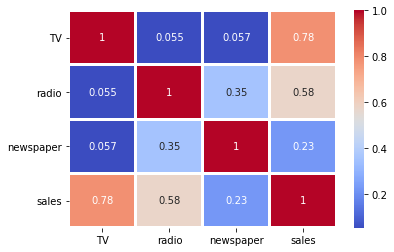

In [9]:
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, linewidths=2)
plt.show()

In [10]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [11]:
X.values, y.values

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5],
        [180.8,  10.8,  58.4],
        [  8.7,  48.9,  75. ],
        [ 57.5,  32.8,  23.5],
        [120.2,  19.6,  11.6],
        [  8.6,   2.1,   1. ],
        [199.8,   2.6,  21.2],
        [ 66.1,   5.8,  24.2],
        [214.7,  24. ,   4. ],
        [ 23.8,  35.1,  65.9],
        [ 97.5,   7.6,   7.2],
        [204.1,  32.9,  46. ],
        [195.4,  47.7,  52.9],
        [ 67.8,  36.6, 114. ],
        [281.4,  39.6,  55.8],
        [ 69.2,  20.5,  18.3],
        [147.3,  23.9,  19.1],
        [218.4,  27.7,  53.4],
        [237.4,   5.1,  23.5],
        [ 13.2,  15.9,  49.6],
        [228.3,  16.9,  26.2],
        [ 62.3,  12.6,  18.3],
        [262.9,   3.5,  19.5],
        [142.9,  29.3,  12.6],
        [240.1,  16.7,  22.9],
        [248.8,  27.1,  22.9],
        [ 70.6,  16. ,  40.8],
        [292.9,  28.3,  43.2],
        [112.9,  17.4,  38.6],
        

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [13]:
xgbmodel = XGBRegressor(objective='reg:squarederror',seed=seed,n_estimators=200)

In [14]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=12)

[0]	validation_0-rmse:12.6524
Will train until validation_0-rmse hasn't improved in 12 rounds.
[1]	validation_0-rmse:11.5386
[2]	validation_0-rmse:10.5268
[3]	validation_0-rmse:9.58758
[4]	validation_0-rmse:8.73447
[5]	validation_0-rmse:7.98099
[6]	validation_0-rmse:7.30955
[7]	validation_0-rmse:6.63613
[8]	validation_0-rmse:6.0251
[9]	validation_0-rmse:5.48483
[10]	validation_0-rmse:5.00248
[11]	validation_0-rmse:4.56483
[12]	validation_0-rmse:4.2104
[13]	validation_0-rmse:3.8769
[14]	validation_0-rmse:3.56284
[15]	validation_0-rmse:3.26628
[16]	validation_0-rmse:3.00126
[17]	validation_0-rmse:2.78507
[18]	validation_0-rmse:2.57019
[19]	validation_0-rmse:2.39015
[20]	validation_0-rmse:2.23672
[21]	validation_0-rmse:2.08135
[22]	validation_0-rmse:1.94658
[23]	validation_0-rmse:1.83148
[24]	validation_0-rmse:1.71813
[25]	validation_0-rmse:1.61915
[26]	validation_0-rmse:1.52698
[27]	validation_0-rmse:1.45664
[28]	validation_0-rmse:1.3923
[29]	validation_0-rmse:1.33567
[30]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [15]:
y_pred = xgbmodel.predict(X_test)

In [16]:
y_pred

array([10.413368 ,  9.275828 ,  9.337279 , 25.374086 , 12.191666 ,
        9.182653 ,  7.8815722, 12.858484 ,  9.343001 , 16.453686 ,
       24.739447 , 10.608526 , 11.0524   , 15.436726 , 11.7553   ,
       12.741527 , 16.046871 ,  5.5048156, 14.548502 , 17.323753 ,
       25.458015 , 10.59973  , 15.7399845, 13.245607 ,  8.513854 ,
       15.189653 , 13.604455 , 21.27068  , 11.350739 ,  8.180817 ,
       11.673257 , 22.587194 , 15.9487505, 22.416716 ,  5.8608623,
        6.476722 ,  9.680634 , 14.302744 , 12.545909 ,  7.647577 ],
      dtype=float32)

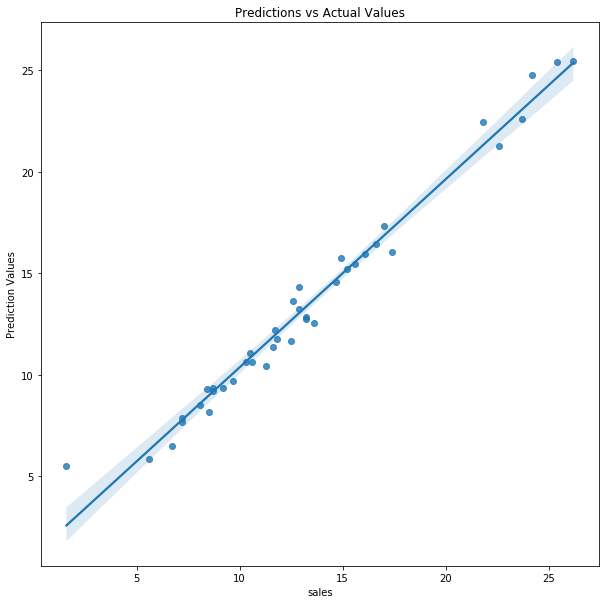

In [17]:
plt.subplots(figsize=(10,10))
plt.title("Predictions vs Actual Values")
plt.ylabel("Prediction Values")
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [18]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is",mse)

Mean Squared Error is 0.784959025262885


In [19]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is",rmse)

Root Mean Squared Error is 0.8859791336498196


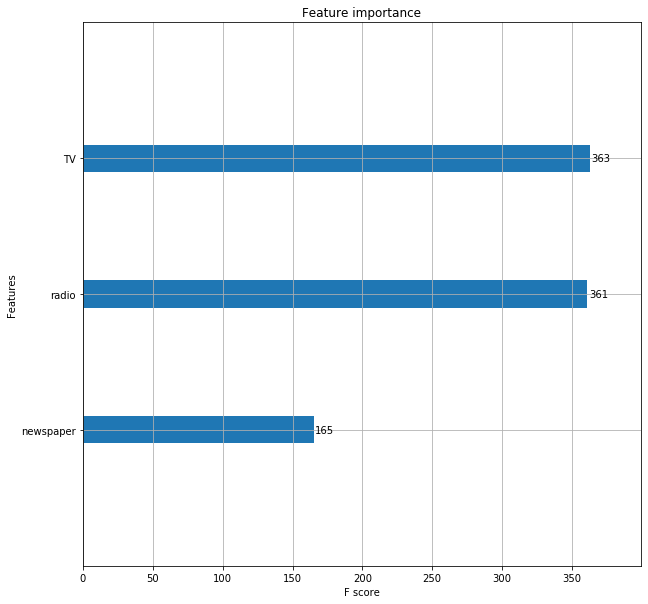

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

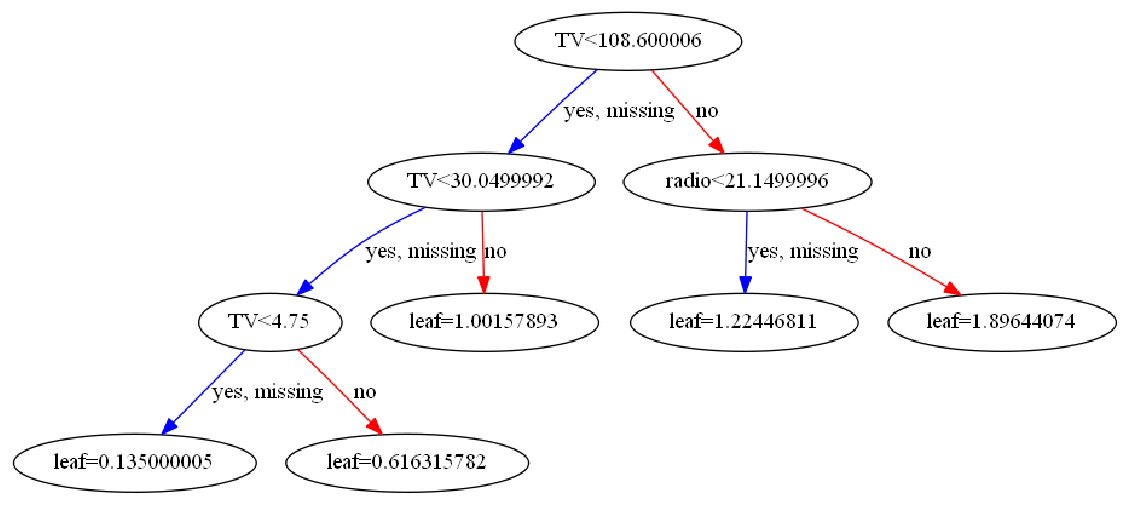

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgbmodel, ax=ax)
plt.show()

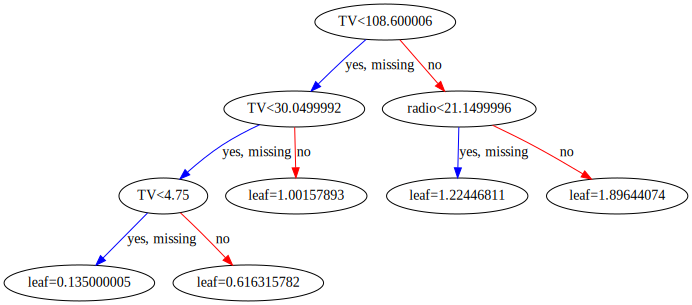

In [22]:
#fig, ax = plt.subplots(figsize=(20,10))
xgb.to_graphviz(xgbmodel)